# 확률 과 표본분포

## 확률

### 결합확률 모형

In [1]:
import numpy as np
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

#독립 확률
print(np.array([12, 8]) / 20)
px = JPD(['X'], [2], np.array([12, 8]) / 20)
print(px)

[0.6 0.4]
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [2]:
#남자 12명(짧은머리 3 긴머리 9) 여자 8명(긴머리7 짧은 머리1)인 경우의 결합 확률
pxy = JPD(['X', 'Y'], [2, 2], np.array([3, 9, 7, 1]) / 20)
print(pxy)


+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [3]:
#주변 확률
#x인수로 받은 확률변수에 대한 주변확률분포
pmx = pxy.marginal_distribution(['X'], inplace=False)
print(pmx)

#인수로 받은 확률변수를 주변화(marginalize)하여 나머지 확률변수에 대한 주변확률분포
pmx = pxy.marginalize(['Y'], inplace=False)
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [4]:
#결합확률로부터 주변확률 P(B),P(B의 여집합) 를 계산
py = pxy.marginal_distribution(['Y'], inplace=False)
print(py)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [5]:
# 사건 A에 대한 조건부확률 3,9
# 3/3+9, 9/3+9
py_on_x0 = pxy.conditional_distribution([('X', 0)], inplace=False)  
print(py_on_x0)

#결합확률로부터 조건부확률 P(B|AC),P(BC|AC) 를 계산
#7/7+1, 1/7+1
py_on_x1 = pxy.conditional_distribution([('X', 1)], inplace=False) 
print(py_on_x1)

#결합확률로부터 조건부확률 P(A|B),P(AC|B) 를 계산
# 사건 B에 대한 조건부확률 3/3+7, 7/3+7
px_on_y0 = pxy.conditional_distribution([('Y', 0)], inplace=False)  
print(px_on_y0)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.2500 |
+------+--------+
| Y(1) | 0.7500 |
+------+--------+
+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.8750 |
+------+--------+
| Y(1) | 0.1250 |
+------+--------+
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.3000 |
+------+--------+
| X(1) | 0.7000 |
+------+--------+


In [6]:
print(pxy.check_independence(['X'], ['Y']))
print(px * py)
print(pxy)

False
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


### 베이즈 정리

In [7]:
from pgmpy.factors.discrete import TabularCPD

cpd_X = TabularCPD('X', 2, [[1 - 0.002], [0.002]])
print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [8]:
#병에 걸리지 않은 경우에는 0.95가 정상 0.05 잘못된 판단
#병에 걸린 경우는 잘못된 판단이 0.01 제대로 판단한 경우는 0.99
cpd_Y_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01], [0.05, 0.99]]),
                        evidence=['X'], evidence_card=[2])
print(cpd_Y_on_X)

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+


In [9]:
from pgmpy.models import BayesianModel

model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_X, cpd_Y_on_X)
model.check_model()

True

In [10]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
posterior = inference.query(['X'], evidence={'Y': 1})
print(posterior)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+


## 표본 추출

In [11]:
import random
li = [10,20,30,40,50]
#복원 추출
for i in range(5):
    print(li[random.randint(0, len(li)-1)], end=' ')
print()
#비복원 추출
print(random.sample(li, k=5))

10 30 40 10 20 
[30, 10, 20, 50, 40]


Finding Elimination Order: : : 0it [09:54, ?it/s]


         income  type
39642   28000.0  Data
4081   150000.0  Data
24748   70000.0  Data
34940   70000.0  Data
25245    9192.0  Data


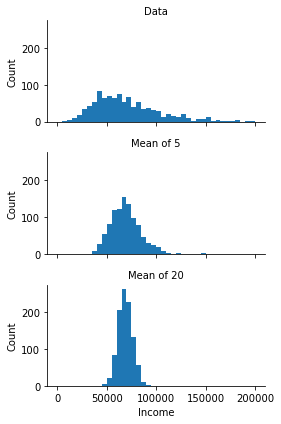

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

loans_income = pd.read_csv('./data/loans_income.csv', squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [16]:
# 가중치를 고려한 추출
import numpy as np
arr = ['Hello', 'Hi', 'Good', 'Nice']
print(np.random.choice(arr, 5, p=[0.5, 0.1, 0.1, 0.3]))

['Hello' 'Nice' 'Hello' 'Hello' 'Hello']


In [17]:
import pandas as pd
import numpy as np
ex_df=pd.DataFrame(np.arange(0,12).reshape(4,3))
print(ex_df)
print()

# 랜덤 샘플 추출 예제
print(ex_df.sample())
print()

print(ex_df.sample(n=3))

Finding Elimination Order: : : 0it [28:02, ?it/s]

   0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

   0  1  2
1  3  4  5

   0   1   2
3  9  10  11
2  6   7   8
1  3   4   5


In [18]:
# weights 입력변수의 사용
print(ex_df.sample(n=3, replace=True, weights=[0.7,0.2,0.1,0]))
print()

#열 샘플링
print(ex_df.sample(n=2, axis=1))

   0  1  2
0  0  1  2
2  6  7  8
0  0  1  2

    1  0
0   1  0
1   4  3
2   7  6
3  10  9


In [19]:
import numpy as np
X = np.arange(20).reshape(10, 2)
print(X)
print()
y = np.arange(10)
print(y)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]

[0 1 2 3 4 5 6 7 8 9]


In [20]:
from sklearn.model_selection import train_test_split
# shuffle = False
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    shuffle=False, 
                                                    random_state=1004)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print()
print(X_train)
print()
print(y_train)

X_train shape: (6, 2)
X_test shape: (4, 2)
y_train shape: (6,)
y_test shape: (4,)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]

[0 1 2 3 4 5]


In [21]:
# shuffle = True
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    shuffle=True, 
                                                    random_state=1004)
print(X_train)
print()
print(y_train)

[[ 2  3]
 [ 8  9]
 [ 6  7]
 [14 15]
 [10 11]
 [ 4  5]]

[1 4 3 7 5 2]


In [22]:
import numpy as np
X = np.arange(30).reshape(15, 2)
print(X)
print()

y = np.arange(15)
print(y)
print()

# stratum (group)
grp = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(grp)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    stratify=grp, 
                                                    random_state=1004)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (12, 2)
X_test shape: (3, 2)
y_train shape: (12,)
y_test shape: (3,)


In [24]:
print(X_train)
print()
print(y_train)
print()
print(X_test)
print()
print(y_test)

[[12 13]
 [ 8  9]
 [28 29]
 [ 0  1]
 [10 11]
 [ 6  7]
 [ 2  3]
 [18 19]
 [20 21]
 [22 23]
 [26 27]
 [14 15]]

[ 6  4 14  0  5  3  1  9 10 11 13  7]

[[16 17]
 [ 4  5]
 [24 25]]

[ 8  2 12]


In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1004)
for train_idx, test_idx in split.split(X, grp):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
print(X_train)
print()
print(y_train)
print()
print(X_test)
print()
print(y_test)

[[12 13]
 [ 8  9]
 [28 29]
 [ 0  1]
 [10 11]
 [ 6  7]
 [ 2  3]
 [18 19]
 [20 21]
 [22 23]
 [26 27]
 [14 15]]

[ 6  4 14  0  5  3  1  9 10 11 13  7]

[[16 17]
 [ 4  5]
 [24 25]]

[ 8  2 12]


In [26]:
import pandas as pd
import numpy as np

X = np.arange(30).reshape(15, 2)
y = np.arange(15)

df = pd.DataFrame(np.column_stack((X, y)), columns=['X1','X2', 'y'])
print(df)

    X1  X2   y
0    0   1   0
1    2   3   1
2    4   5   2
3    6   7   3
4    8   9   4
5   10  11   5
6   12  13   6
7   14  15   7
8   16  17   8
9   18  19   9
10  20  21  10
11  22  23  11
12  24  25  12
13  26  27  13
14  28  29  14


In [27]:
df['grp'] = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(df)

    X1  X2   y  grp
0    0   1   0    0
1    2   3   1    0
2    4   5   2    0
3    6   7   3    0
4    8   9   4    0
5   10  11   5    1
6   12  13   6    1
7   14  15   7    1
8   16  17   8    1
9   18  19   9    1
10  20  21  10    1
11  22  23  11    1
12  24  25  12    1
13  26  27  13    1
14  28  29  14    1


In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1004)
for train_idx, test_idx in split.split(df, df["grp"]):
    df_strat_train = df.loc[train_idx]
    df_strat_test = df.loc[test_idx]
print(df_strat_train)
print()
print(df_strat_test)

    X1  X2   y  grp
6   12  13   6    1
4    8   9   4    0
14  28  29  14    1
0    0   1   0    0
5   10  11   5    1
3    6   7   3    0
1    2   3   1    0
9   18  19   9    1
10  20  21  10    1
11  22  23  11    1
13  26  27  13    1
7   14  15   7    1

    X1  X2   y  grp
8   16  17   8    1
2    4   5   2    0
12  24  25  12    1


In [29]:
print(df["grp"].value_counts() / len(df))
print()
print(df_strat_train["grp"].value_counts() / len(df_strat_train))
print()
print(df_strat_test["grp"].value_counts() / len(df_strat_test))

1    0.666667
0    0.333333
Name: grp, dtype: float64

1    0.666667
0    0.333333
Name: grp, dtype: float64

1    0.666667
0    0.333333
Name: grp, dtype: float64


## 확률 분포

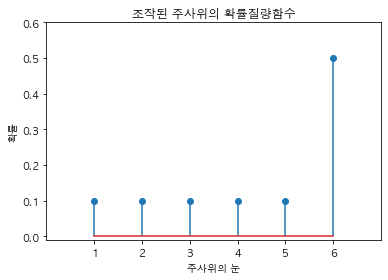

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import matplotlib
import seaborn as sns

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

x = np.arange(1, 7)
y = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
plt.stem(x, y)
plt.title("조작된 주사위의 확률질량함수")
plt.xlabel("주사위의 눈")
plt.ylabel("확률")
plt.xlim(0, 7)
plt.ylim(-0.01, 0.6)
plt.xticks(np.arange(6) + 1)
plt.show()


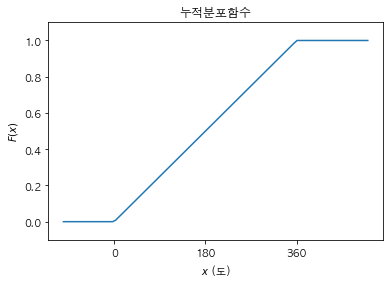

In [10]:
t = np.linspace(-100, 500, 100)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
plt.plot(t, F)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("누적분포함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$F(x)$")
plt.show()

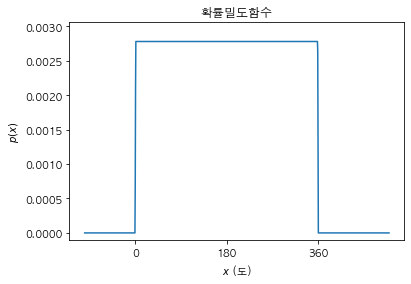

In [11]:
t = np.linspace(-100, 500, 1000)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
p = np.gradient(F, 600/1000)  # 수치미분
plt.plot(t, p)
plt.ylim(-0.0001, p.max()*1.1)
plt.xticks([0, 180, 360])
plt.title("확률밀도함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$p(x)$")
plt.show()

## 다변수 확률 변수

X  A  B  C  D  E  F
Y                  
A  1  2  1  0  0  0
B  0  2  3  1  0  0
C  0  4  7  4  1  0
D  0  1  4  5  4  0
E  0  0  1  3  2  0
F  0  0  0  1  2  1

X     A     B     C     D     E     F
Y                                    
A  0.02  0.04  0.02  0.00  0.00  0.00
B  0.00  0.04  0.06  0.02  0.00  0.00
C  0.00  0.08  0.14  0.08  0.02  0.00
D  0.00  0.02  0.08  0.10  0.08  0.00
E  0.00  0.00  0.02  0.06  0.04  0.00
F  0.00  0.00  0.00  0.02  0.04  0.02


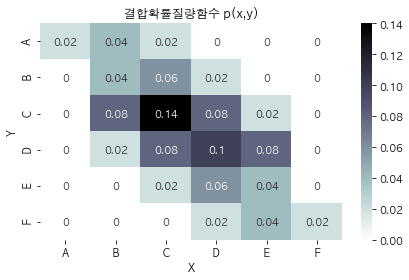

In [21]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import matplotlib
import seaborn as sns
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

#데이터 생성
grades = ["A", "B", "C", "D", "E", "F"]
scores = pd.DataFrame(
    [[1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
     [0, 4, 7, 4, 1, 0],
     [0, 1, 4, 5, 4, 0],
     [0, 0, 1, 3, 2, 0],
     [0, 0, 0, 1, 2, 1]], 
    columns=grades, index=grades)
scores.index.name = "Y"
scores.columns.name = "X"
print(scores)
print()

#결합질량함수
pmf = scores / scores.values.sum()
print(pmf)

#히트맵
sns.heatmap(pmf, cmap=matplotlib.cm.bone_r, annot=True,
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("결합확률질량함수 p(x,y)")
plt.tight_layout()
plt.show()


In [22]:
pmf_marginal_x = pmf.sum(axis=0)
print(pmf_marginal_x)
print()

pmf_marginal_y = pmf.sum(axis=1)
print(pmf_marginal_y[:, np.newaxis])

X
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

[[0.08]
 [0.12]
 [0.32]
 [0.28]
 [0.12]
 [0.08]]


<ipython-input-22-9ce970b65949>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(pmf_marginal_y[:, np.newaxis])


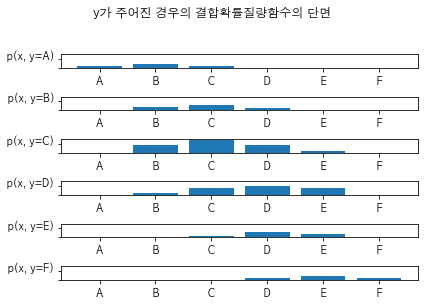

In [23]:
import string

x = np.arange(6)
for i, y in enumerate(string.ascii_uppercase[:6]):
    ax = plt.subplot(6, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.bar(x, pmf.iloc[i, :])
    plt.ylabel("p(x, y={})".format(y), rotation=0, labelpad=30)
    plt.ylim(0, 0.15)
    plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.suptitle("y가 주어진 경우의 결합확률질량함수의 단면", y=1.05)
plt.tight_layout()
plt.show()

In [24]:
#Y의 값이 A 일 때의 조건부확률질량함수
print(pmf.iloc[0, :])

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64


In [25]:
#Y의 값이 A 일 때의 조건부확률질량함수
print(pmf.iloc[0, :])
print()
print(np.sum(pmf.iloc[0, :]))

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

0.08


In [26]:
cond_y0 = pmf.iloc[0, :]/pmf_marginal_y[0]
print(cond_y0)
print()
print(np.sum(cond_y0))

X
A    0.25
B    0.50
C    0.25
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

1.0


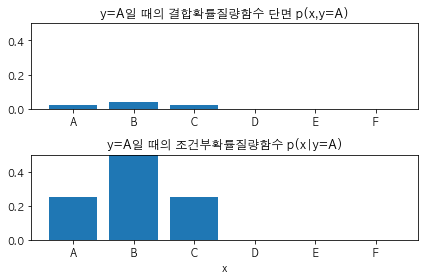

In [27]:
plt.subplot(211)
plt.bar(x, pmf.iloc[0, :])
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 결합확률질량함수 단면 p(x,y=A)")
plt.subplot(212)
plt.bar(x, cond_y0)
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 조건부확률질량함수 p(x|y=A)")
plt.xlabel("x")
plt.tight_layout()
plt.show()

## 확률 분포 모형

### 정규 분포

In [12]:
#샘플 데이터 생성
import numpy as np
np.random.seed(0)
x = np.random.normal(size=21)
print(x)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982]


/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


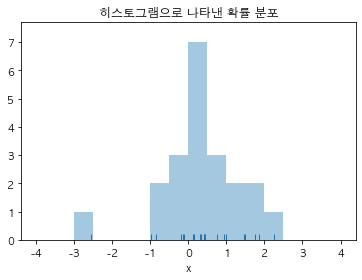

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import matplotlib
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

#-4부터 4까지의 구간을 17개의 구간으로 분할
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램으로 나타낸 확률 분포")
plt.xlabel("x")
plt.show()

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


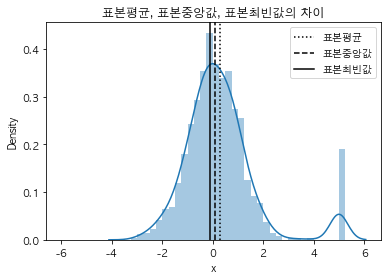

In [15]:
#대칭인 분포를 비대칭으로 만드는 데이터가 더해졌을 때 표본평균, 표본중앙값, 표본최빈값의 변화

np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)

plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")

plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

In [16]:
import scipy as sp
import scipy.stats

print(sp.stats.skew(x)) #표본 왜도
print(sp.stats.kurtosis(x))# 표본 첨도

print(sp.stats.moment(x, 1))
print(sp.stats.moment(x, 2))
print(sp.stats.moment(x, 3))
print(sp.stats.moment(x, 4))

1.483455252566149
3.522807122867409
0.0
2.032795146183378
4.299469507677599
26.953909563990607


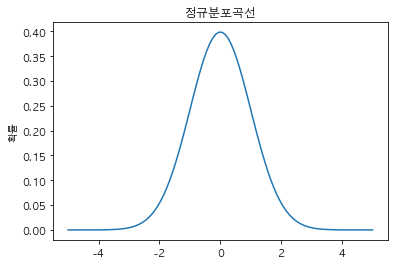

[-0.15323616 -2.43250851  0.50798434 -0.32403233 -1.51107661 -0.87142207
 -0.86482994  0.60874908  0.5616381   1.51475038  0.64792481 -1.35164939
 -1.40920928  1.13072535  1.5666862  -0.2377481   0.55880299 -1.50489128
 -1.94392176 -1.17402368 -0.35718753 -0.52137639 -0.23011406 -0.49101443
  0.67930114  1.42754695  0.03619746  2.02999749 -0.63440471 -0.52510339
  0.38773466 -0.35479876  1.17705226 -0.64110782  1.32269399  0.19417502
  2.56545278 -0.46411491 -0.20269391  0.14565182 -2.18102797  0.60226513
  0.48084611  0.10931836 -1.54439578 -1.54656104  0.58661852  1.17517869
  1.59446463 -0.89544152 -1.03079803 -0.2719388  -1.97573014 -0.58893118
  0.85178964  1.6346025   0.27915545  1.64055365  0.41087294  0.19136392
 -0.17144119  0.18693705 -0.25485295 -0.14091075 -0.66189183  0.2590319
  0.01444842 -1.47958003 -0.2407005  -0.85567139 -2.04820046  0.48388365
  1.55868825  2.36973019  1.56241953 -0.87080155  1.17524499  1.119899
 -1.98782953  0.86128852  0.62717704  0.16280825  0.28

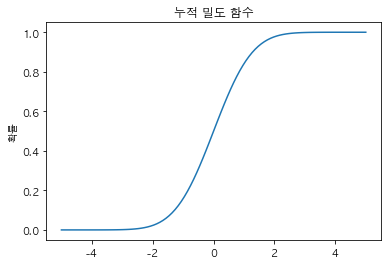

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import scipy as sp
from scipy import stats
import platform
import matplotlib

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

mu = 0
std = 1
rv = sp.stats.norm(mu, std) #평균이 0이고 표준편차가 1인 정규분포 객체 생성 
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx)) #확률 밀도 함수를 적용해서 그래프를 생성
plt.ylabel("확률")
plt.title("정규분포곡선")
plt.show()
x = rv.rvs(100) #랜덤한 샘플 100개 만들기
print(x)

#cdf 메서드는 이산확률변수와 연속확률변수의 누적분포함수의 역할 
#표본 값을 입력하면 해당 표본 값에 대한 누적확률을 출력
plt.plot(xx, rv.cdf(xx)) #누적 확률 밀도 함수를 적용해서 그래프를 생성
plt.ylabel("확률")
plt.title("누적 밀도 함수")
plt.show()


               High      Low     Open    Close    Volume     Adj Close
Date                                                                  
2019-01-02  51200.0  48200.0  51100.0  48500.0  271228.0  44444.750000
2019-01-03  49150.0  47900.0  49150.0  48350.0  178992.0  44307.289062
2019-01-04  49450.0  47950.0  47950.0  49250.0  166264.0  45132.039062
2019-01-07  50700.0  49600.0  49650.0  50300.0  118533.0  46094.246094
2019-01-08  50600.0  49650.0  50500.0  49900.0  112218.0  45727.691406
...             ...      ...      ...      ...       ...           ...
2019-12-23  52900.0  52100.0  52700.0  52900.0  120521.0  48476.847656
2019-12-24  53600.0  52900.0  52900.0  53200.0  135485.0  48751.765625
2019-12-26  53700.0  52600.0  53600.0  53200.0  155293.0  48751.765625
2019-12-27  52400.0  51300.0  51800.0  52200.0  151951.0  49607.058594
2019-12-30  52500.0  51200.0  52500.0  51600.0  106523.0  49036.863281

[245 rows x 6 columns]


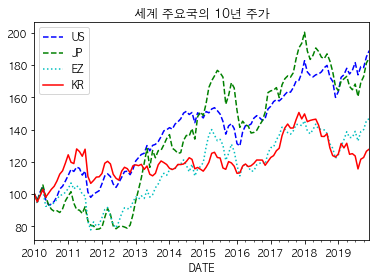

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import scipy as sp
from scipy import stats
import platform
import matplotlib

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

import pandas_datareader.data as web
import datetime

#yahoo에서 gs의 주가 가져오기
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 12, 31)

gs = web.DataReader("078930.KS", "yahoo", start, end)
print(gs)

#미국, 일본, 유럽, 한국 주가지수 가져와서 그래프 그리기
symbols=[
    'SPASTT01USM661N',
    'SPASTT01JPM661N',
    'SPASTT01EZM661N',
    'SPASTT01KRM661N'
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(
    sym, data_source="fred", start="2010-01-01", end="2019-12-31")[sym]
    
data.columns =['US', 'JP', 'EZ', 'KR']
data = data/data.iloc[0] *100
styles = ['b--', 'g--', 'c:', 'r-']
data.plot(style=styles)
plt.title('세계 주요국의 10년 주가')
plt.show() 

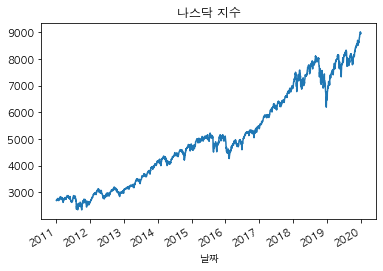

In [20]:
#nasdaq 지수 가져오기
symbol = "NASDAQCOM"
data = pd.DataFrame()
data[symbol] = web.DataReader(
    symbol, data_source="fred", start="2011-01-01", end="2019-12-31")[symbol]

data = data.dropna()
data.plot(legend=False)
plt.xlabel("날짜")
plt.title("나스닥 지수")
plt.show()

In [21]:
#일차별 차이값 구하기
daily_returns = data.pct_change().dropna()
#평균과 
mean = daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print("평균 일간수익률: {:3.2f}%".format(mean * 100))
print("평균 일간변동성: {:3.2f}%".format(std * 100))

평균 일간수익률: 0.06%
평균 일간변동성: 1.05%


/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


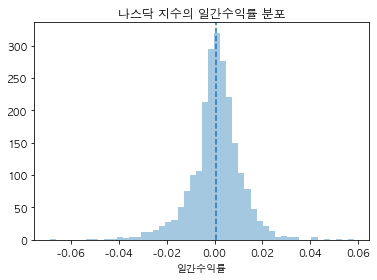

In [22]:
import seaborn as sns

sns.distplot(daily_returns, kde=False)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls="--")
plt.ylim(0, ymax)
plt.title("나스닥 지수의 일간수익률 분포")
plt.xlabel("일간수익률")
plt.show()

### 로그 정규 분포

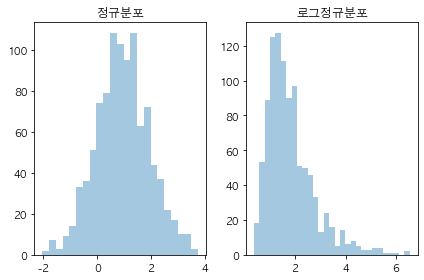

In [23]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2)
sns.distplot(x1, kde=False, ax=ax[0])
ax[0].set_title("정규분포")
sns.distplot(x2, kde=False, ax=ax[1])
ax[1].set_title("로그정규분포")
plt.tight_layout()
plt.show()

### Q-Q Plot

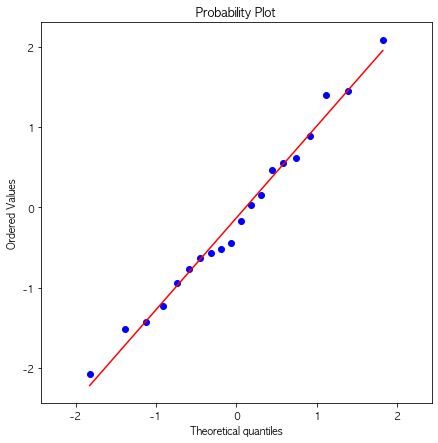

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import scipy as sp
from scipy import stats
import platform
import matplotlib
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

mu = 0
std = 1
rv = sp.stats.norm(mu, std) #평균이 0이고 표준편차가 1인 정규분포 객체 생성 
x = rv.rvs(20)

plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

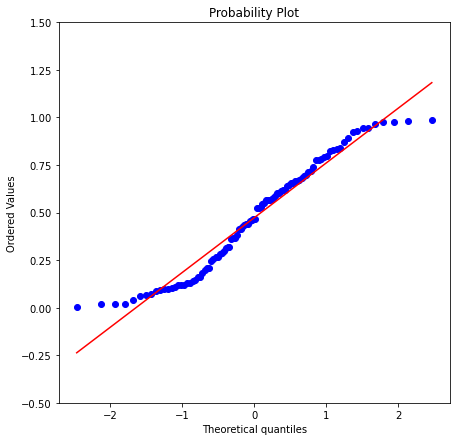

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import scipy as sp
from scipy import stats
import matplotlib
%matplotlib inline

np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

### 중심극한정리

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

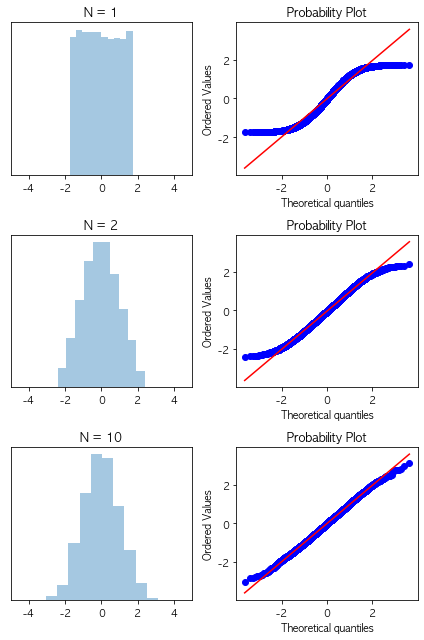

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy as sp
from scipy import stats
import platform
import matplotlib

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)
plt.tight_layout()
plt.show()

### 균일 분포

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


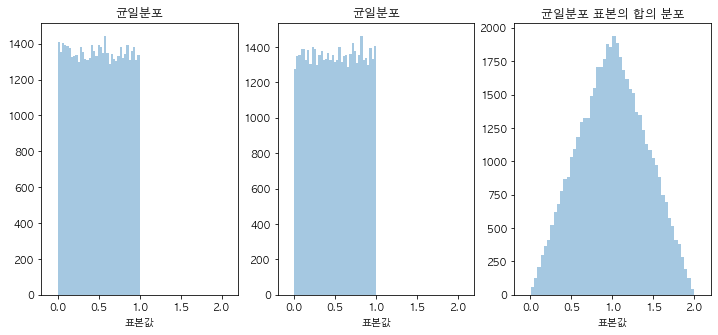

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy as sp
from scipy import stats
import platform
import matplotlib
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12, 5))

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.show()

### 베르누이 분포

<class 'scipy.stats._distn_infrastructure.rv_frozen'>



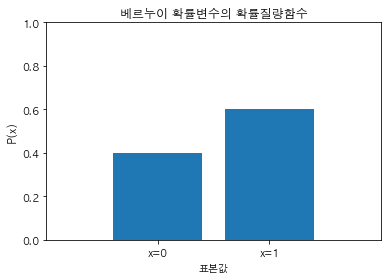

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy as sp
from scipy import stats
import platform
import matplotlib
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

mu = 0.6
rv = sp.stats.bernoulli(mu)
print(type(rv))
print()

xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()


[1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1]


/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


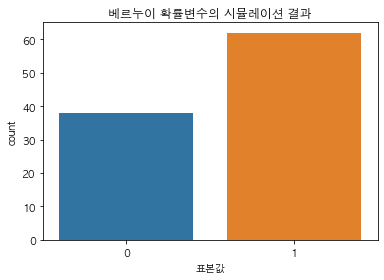

In [7]:
#100개의 샘플 데이터 생성
x = rv.rvs(100, random_state=0)
print(x)
#시각화
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

    이론  시뮬레이션
0  0.4   0.38
1  0.6   0.62

   표본값     유형    비율
0    0     이론  0.40
1    0  시뮬레이션  0.38
2    1     이론  0.60
3    1  시뮬레이션  0.62



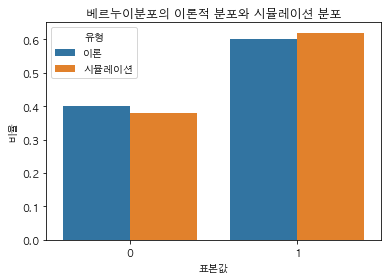

In [8]:
import pandas as pd
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
print(df)
print()

df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
print(df2)
print()

sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

In [9]:
s = sp.stats.describe(x)
print(type(s))
for v in s:
    print(v)

<class 'scipy.stats.stats.DescribeResult'>
100
(0, 1)
0.62
0.23797979797979804
-0.4944513860581973
-1.755517826825128


### 이항분포

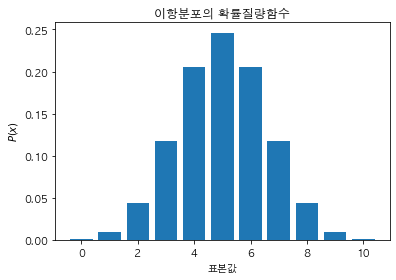

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy as sp
from scipy import stats
import platform
import matplotlib
import pandas as pd
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

N = 10
mu = 0.5
rv = sp.stats.binom(N, mu)
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()

[5 6 5 5 5 6 5 7 8 5 6 5 5 7 3 3 2 7 6 7 8 6 5 6 3 6 3 7 5 5 4 6 5 5 2 5 5
 5 7 6 4 5 6 3 6 6 4 3 4 4 5 5 8 3 4 3 6 4 5 4 3 3 6 3 4 4 6 3 7 3 8 5 8 5
 6 2 4 3 4 3 4 5 3 6 5 4 5 3 5 7 4 6 3 6 4 4 5 2 7 1]


/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


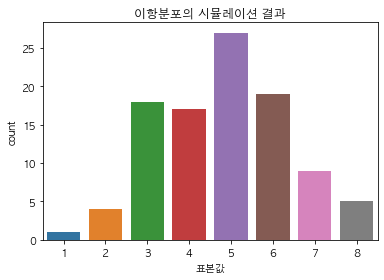

In [11]:
#샘플 데이터 추출
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [12]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
print(df)

    표본값     유형        비율
0     0     이론  0.000977
1     0  시뮬레이션  0.000000
2     1     이론  0.009766
3     1  시뮬레이션  0.010000
4     2     이론  0.043945
5     2  시뮬레이션  0.040000
6     3     이론  0.117188
7     3  시뮬레이션  0.180000
8     4     이론  0.205078
9     4  시뮬레이션  0.170000
10    5     이론  0.246094
11    5  시뮬레이션  0.270000
12    6     이론  0.205078
13    6  시뮬레이션  0.190000
14    7     이론  0.117188
15    7  시뮬레이션  0.090000
16    8     이론  0.043945
17    8  시뮬레이션  0.050000
18    9     이론  0.009766
19    9  시뮬레이션  0.000000
20   10     이론  0.000977
21   10  시뮬레이션  0.000000


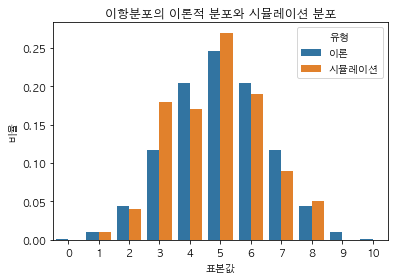

In [13]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

### 카테고리 분포

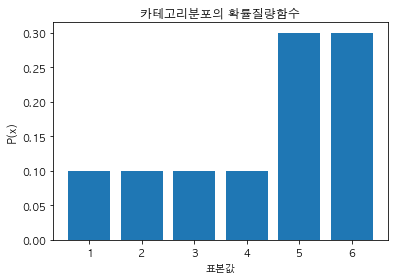

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy as sp
from scipy import stats
import platform
import matplotlib
import pandas as pd
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel("표본값")
plt.title("카테고리분포의 확률질량함수")
plt.show()

In [15]:
np.random.seed(1)
X = rv.rvs(100)
X[:10]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0]])

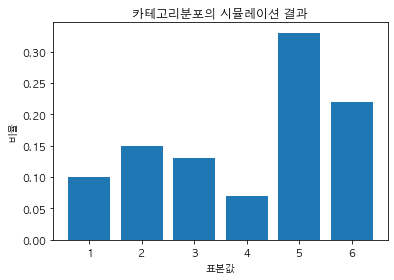

In [16]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.ylabel("비율")
plt.show()

In [17]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                  index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
print(df)

    표본값     유형    비율
0     1     이론  0.10
1     1  시뮬레이션  0.10
2     2     이론  0.10
3     2  시뮬레이션  0.15
4     3     이론  0.10
5     3  시뮬레이션  0.13
6     4     이론  0.10
7     4  시뮬레이션  0.07
8     5     이론  0.30
9     5  시뮬레이션  0.33
10    6     이론  0.30
11    6  시뮬레이션  0.22


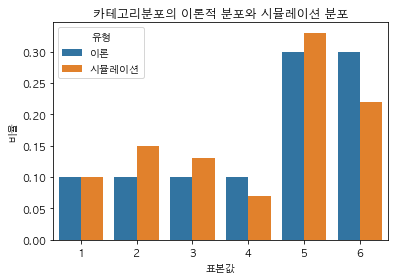

In [18]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("카테고리분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

In [19]:
### 스튜던트 t 분포

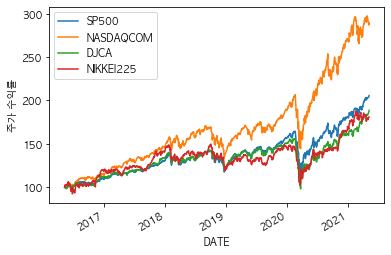

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy as sp
from scipy import stats
import platform
import matplotlib
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

#S&P 500, 나스닥(Nasdaq), 다우존스(Dow-Jones), 니케이255(Nikkei255) 
symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plt.ylabel("날짜")
plt.ylabel("주가 수익률")
plt.show()

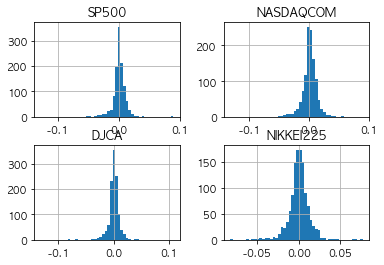

In [21]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

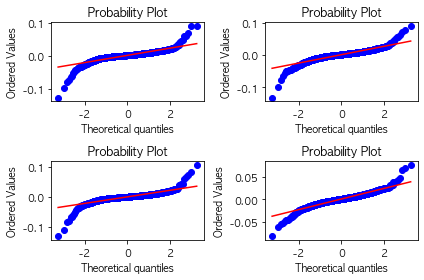

In [22]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

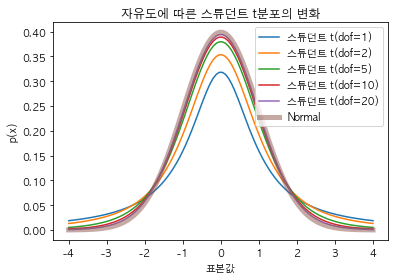

In [23]:
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("스튜던트 t(dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 스튜던트 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


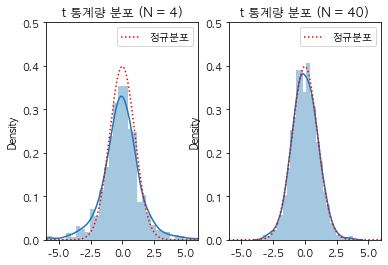

In [24]:
np.random.seed(0)
rv = sp.stats.norm()
M = 1000
plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)

plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 4)")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 40)")
plt.legend()

### 카이제곱 분포

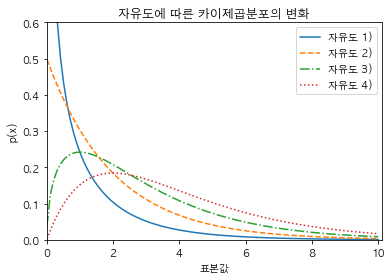

In [25]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("자유도 %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


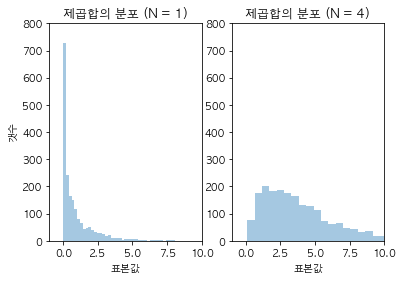

In [26]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 2, 1)
N = 1
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 1)")
plt.xlabel("표본값")
plt.ylabel("갯수")

plt.subplot(1, 2, 2)
N = 4
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 4)")
plt.xlabel("표본값")

plt.show()


### F 분포

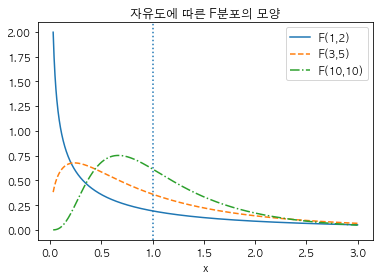

In [27]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


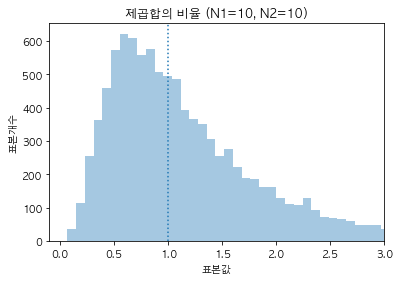

In [28]:
np.random.seed(0)

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)
t = t2 / t1

sns.distplot(t, bins=200, kde=False)
plt.axvline(1, ls=":");
plt.xlim(-0.1, 3)
plt.title("제곱합의 비율 (N1=10, N2=10)")
plt.xlabel("표본값")
plt.ylabel("표본개수")
plt.show()

### 푸아송 분포

[Text(0.5, 0, '푸아송 분포'), Text(0, 0.5, '빈도 수')]

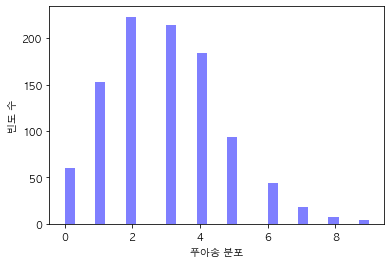

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform
from matplotlib import font_manager, rc
import seaborn as sns
import scipy as sp
from scipy import stats
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

data_poisson = stats.poisson.rvs(mu=3, size=1000)

ax = sns.distplot(data_poisson,
                 bins=30,
                 color='blue',
                 kde=False,
                 hist_kws={'linewidth':1, 'alpha':0.5})
ax.set(xlabel='푸아송 분포', ylabel='빈도 수')

### 지수 분포

Text(0.5, 1.0, 'Exponential Distribution')

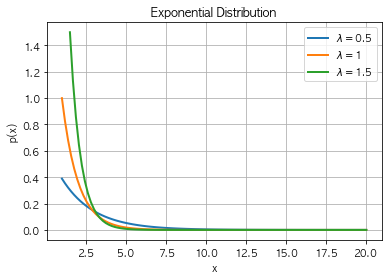

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform
from matplotlib import font_manager, rc
import seaborn as sns
import scipy as sp
import scipy.stats as sc

pdp = []
loc = 0.5
scale = 1./0.5
pd = sc.expon(loc=loc, scale=scale)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$0.5')
 
pdp = []
loc = 1
scale = 1./1
pd = sc.expon(loc=loc, scale=scale)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1')

pdp = []
loc = 1.5
scale = 1./1.5
pd = sc.expon(loc=loc, scale=scale)
x = np.linspace(1.5, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1.5')

plt.grid(True)
plt.legend()
plt.ylabel('p(x)')
plt.xlabel('x')
plt.title('Exponential Distribution')

### 감마 분포

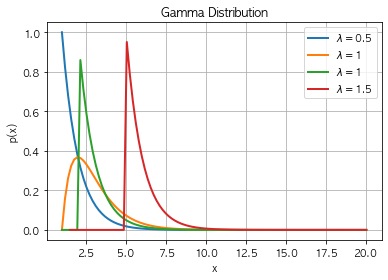

In [32]:
pdp = []
loc = 1
pd = sc.gamma(a=1, loc=loc)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$0.5')

pdp = []
loc = 1
pd = sc.gamma(a=2, loc=loc)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1')
 
pdp = []
loc = 2
pd = sc.gamma(a=1, loc=loc)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1')

pdp = []
loc = 5
pd = sc.gamma(a=1, loc=loc)
x = np.linspace(1.5, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1.5')
 
plt.grid(True)
plt.legend()
plt.ylabel('p(x)')
plt.xlabel('x')
plt.title('Gamma Distribution')
plt.show()

### 베이불 분포

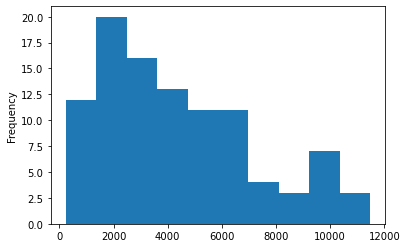

In [16]:
###  Weibull Distribution
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

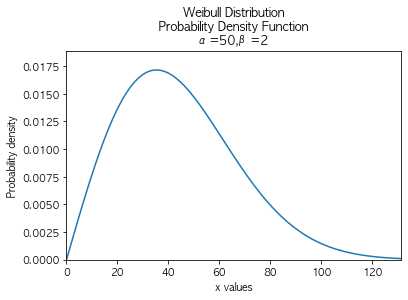

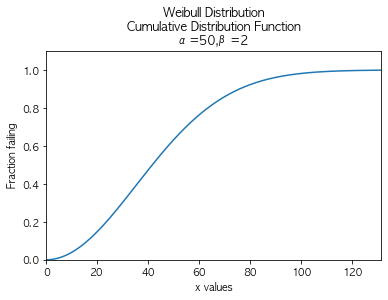

In [41]:
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt

#scale 은 50, shape는 2 
dist = Weibull_Distribution(alpha=50, beta=2)  # this created the distribution object
dist.PDF()  # this creates the plot of the PDF
plt.show()

dist.CDF()
plt.show()

## 재표본추출

### 부트스트랩

In [1]:
import pandas as pd
import numpy as np
np.random.seed(104)

df = pd.read_csv('./data/coffee_dataset.csv')
print(df.head())
print(df.info())

   user_id   age  drinks_coffee     height
0     4509   <21          False  64.538179
1     1864  >=21           True  65.824249
2     2060   <21          False  71.319854
3     7875  >=21           True  68.569404
4     6254   <21           True  64.020226
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB
None


In [2]:
df_sample = df.sample(200)
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 486 to 914
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB
None


In [3]:
#커피를 마시는 사람과 그렇지 않은 사람의 키 평균 차이
iterationNum = 10000
diffHeightList = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    nonCoffeeHeightMean = bootSample[bootSample['drinks_coffee'] == False].height.mean() # 커피를 마시지 않는 사람 평균 키
    coffeeHeightMean = bootSample[bootSample['drinks_coffee'] == True].height.mean() # 커피를 마시는 사람 평균 키
    diff = nonCoffeeHeightMean - coffeeHeightMean
    diffHeightList.append(diff)
#  신뢰수준 99.5%인 평균 키 차이에 대한 신뢰구간
print(np.percentile(diffHeightList, 0.5), np.percentile(diffHeightList, 99.5))

-3.1319975931075725 -0.7811253958264726


In [45]:
#21세 이상의 사람과 21세 미만의 키 평균 차이
diffHeightListByAge = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    over21HeightMean = bootSample[bootSample['age'] == '>=21'].height.mean() # 21살 이상 평균 키
    under21HeightMean = bootSample[bootSample['age'] == '<21'].height.mean() # 21살 미만 평균 키
    diff = over21HeightMean - under21HeightMean
    diffHeightListByAge.append(diff)

np.percentile(diffHeightListByAge, 0.5), np.percentile(diffHeightListByAge, 99.5)

(3.094910696764073, 4.97970620735041)

In [46]:
#21살 미만인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
diffHeightListUnder21 = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    nonCoffeeHeightMeanUnder21 = bootSample.query("age == '<21' and drinks_coffee == False").height.mean() # 21살 미만이며 커피를 마시지 않는 사람 평균 키
    coffeeHeightMeanUnder21 = bootSample.query("age == '<21' and drinks_coffee == True").height.mean() # 21살 미만이며 커피를 마시는 사람 평균 키
    diff = nonCoffeeHeightMeanUnder21 - coffeeHeightMeanUnder21
    diffHeightListUnder21.append(diff)

np.percentile(diffHeightListUnder21, 0.5), np.percentile(diffHeightListUnder21, 99.5)

(0.265445115542466, 2.473977523788757)

In [20]:
#21살 이상인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
diffHeightListOver21 = []
for _ in range(10000):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    nonCoffeeHeightMeanOver21 = bootSample.query("age != '<21' and drinks_coffee == False").height.mean() # 21살 이상이며 커피를 마시지 않는 사람 평균 키
    coffeeHeightMeanOver21 = bootSample.query("age != '<21' and drinks_coffee == True").height.mean() # 21살 이상이며 커피를 마시는 사람 평균 키
    diff = nonCoffeeHeightMeanOver21 - coffeeHeightMeanOver21
    diffHeightListOver21.append(diff)
np.percentile(diffHeightListOver21, 0.5), np.percentile(diffHeightListOver21, 99.5)

(nan, nan)

In [4]:
# 1. 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
print(df[df['drinks_coffee'] == False].height.mean() - df[df['drinks_coffee'] == True].height.mean())
# 2. 21살 이상과 21살 미만인 사람들의 평균 키 차이
print(df[df['age'] == '>=21'].height.mean() - df[df['age'] == '<21'].height.mean())
# 3. 21살 미만인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
print(df.query("age == '<21' and drinks_coffee == False").height.mean() - df.query("age == '<21' and drinks_coffee == True").height.mean())
# 4. 21살 이상인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
print(df.query("age != '<21' and drinks_coffee == False").height.mean() - df.query("age != '<21' and drinks_coffee == True").height.mean())

-1.9568024933369799
3.88229124992111
1.6993900935511732
1.9509354889786579


In [14]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -71.28800000000047
std. error: 215.17424686173106
